In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


In [3]:
# movies = pd.read_table('./data/ml-10M100K/movies.dat', sep='::', names=['movie_id', 'title', 'genre'])
# # movies = pd.read_table('./data/ml-10M100K/movies.dat', sep='::', engine='python')

# ratings = pd.read_table("./data/ml-10M100K/ratings.dat", sep="::", names=["user_id", "movie_id", "rating", "timestamp"], engine='python')
# # ratings = pd.read_table("./data/ml-10M100K/ratings.dat", sep="::", engine='python')

# tags = pd.read_table("./data/ml-10M100K/tags.dat", sep="::", names=["user_id", "movie_id", "tag", "timestamp"], engine='python')
# # tags = pd.read_table("./data/ml-10M100K/tags.dat", sep="::", engine='python')

# movies.to_pickle("movies.pkl")
# ratings.to_pickle("ratings.pkl")
# tags.to_pickle("tags.pkl")

#### NOTE: the entire notebook code below has been tested after loading MovieLens 25M as well and works perfectly. However, it will not be used because of the computational difficulty especailly for creating TFIDF matrix

In [4]:
# movies = pd.read_pickle("movies_25m.pkl")
# ratings = pd.read_pickle("ratings_25m.pkl")
# tags= pd.read_pickle("tags_25m.pkl")

# movie_lens_columns = {
#     "movie_id": "movieId",
#     "user_id": "userId",
#     "rating": "rating",
#     "genre": "genres"
# }


movies = pd.read_pickle("movies.pkl")
ratings = pd.read_pickle("ratings.pkl")
tags= pd.read_pickle("tags.pkl")

movie_lens_columns = {
    "movie_id": "movie_id",
    "user_id": "user_id",
    "rating": "rating",
    "genre": "genre"
}



In [5]:
ratings

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


## Drop unwanted columns

In [6]:
ratings = ratings.drop("timestamp", axis=1)
ratings

,user_id,movie_id,rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0
3,1,292,5.0
4,1,316,5.0
...,...,...,...
10000049,71567,2107,1.0
10000050,71567,2126,2.0
10000051,71567,2294,5.0
10000052,71567,2338,2.0


In [7]:
tags

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835
...,...,...,...,...
95575,71556,1377,Gothic,1188263571
95576,71556,2424,chick flick,1188263606
95577,71556,3033,comedy,1188263626
95578,71556,3081,Gothic,1188263565


In [8]:
tags = tags.drop("timestamp", axis=1)
tags

,user_id,movie_id,tag
0,15,4973,excellent!
1,20,1747,politics
2,20,1747,satire
3,20,2424,chick flick 212
4,20,2424,hanks
...,...,...,...
95575,71556,1377,Gothic
95576,71556,2424,chick flick
95577,71556,3033,comedy
95578,71556,3081,Gothic


In [9]:
movies

,movie_id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [10]:
movies.isna().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [11]:
movies.drop("title", axis=1)

,movie_id,genre
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
...,...,...
10676,65088,Adventure|Children|Comedy
10677,65091,Crime|Drama|Romance
10678,65126,Comedy|Drama
10679,65130,Drama|Romance


In [12]:
tags.isna().sum()

user_id      0
movie_id     0
tag         16
dtype: int64

In [13]:
tags[tags["tag"].isna()]

,user_id,movie_id,tag
62986,44030,123,NaN
62987,44030,346,NaN
62989,44030,1184,NaN
62993,44030,1785,NaN
62994,44030,2194,NaN
62995,44030,2691,NaN
63001,44030,4103,NaN
63002,44030,4473,NaN
63004,44030,4616,NaN
63018,44030,7624,NaN


### Remove NAs from tags dataframe

In [14]:
tags_dropna = tags.dropna(how="all", subset=["tag"], axis=0)
tags_dropna

,user_id,movie_id,tag
0,15,4973,excellent!
1,20,1747,politics
2,20,1747,satire
3,20,2424,chick flick 212
4,20,2424,hanks
...,...,...,...
95575,71556,1377,Gothic
95576,71556,2424,chick flick
95577,71556,3033,comedy
95578,71556,3081,Gothic


In [15]:
tags_dropna.isna().sum()

user_id     0
movie_id    0
tag         0
dtype: int64

In [16]:
ratings.isna().sum()

user_id     0
movie_id    0
rating      0
dtype: int64

## All 3 files contain a different number of movie IDs

In [17]:
print(len(tags[movie_lens_columns["movie_id"]].unique()))
print(len(movies[movie_lens_columns["movie_id"]].unique()))
print(len(ratings[movie_lens_columns["movie_id"]].unique()))

7601
10681
10677


In [18]:
# Find all the grenres given a movie ID
def genres_in_movie(id):
    return str((movies.loc[movies[movie_lens_columns["movie_id"]] == id][movie_lens_columns["genre"]])[0]).split("|")
genres_in_movie_1 = genres_in_movie(1)
genres_in_movie_1

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

### Exploring tag content

In [19]:
def tags_in_movie(id):
    return list(set(tags.loc[tags[movie_lens_columns["movie_id"]] == id]['tag']))

tags_for_movie_1 = tags_in_movie(1)
tags_for_movie_1

['family',
 'é˜®ä¸€é¸£',
 "Tumey's To See Again",
 'John Lasseter',
 'National Film Registry',
 'imdb top 250',
 'adventure',
 'rated-G',
 'almost favorite',
 'action figure',
 'light',
 'toys',
 'pixar',
 'animated',
 'buddy movie',
 'Woody',
 'comedy',
 'action figures',
 'USA',
 'fanciful',
 'Pixar animation',
 'Want',
 'classic',
 'rousing',
 'witty',
 'Tim Allen',
 'clever',
 'computer animation',
 "Tumey's VHS",
 'fun',
 'want to see again',
 'lots of heart',
 'Tom Hanks',
 'Engaging',
 'animation',
 'CG animation',
 "erlend's DVDs",
 'kids movie',
 '3D',
 'humorous',
 'DARING RESCUES',
 'UNLIKELY FRIENDSHIPS',
 'HEROIC MISSION',
 'avi',
 'cgi',
 'Buzz Lightyear',
 'funny',
 'Animation',
 'disney',
 'very good',
 'buy',
 'Cartoon',
 'children',
 'fantasy',
 'Disney',
 'the boys',
 'bright',
 'Pixar',
 'Disney animated feature',
 'ya boy',
 'toy',
 'first cgi film',
 'time travel',
 'TOYS COME TO LIFE',
 'villian hurts toys',
 'warm']

### Check if genres are included in tags

In [20]:
for val in genres_in_movie_1:
    if val not in tags_for_movie_1:
        print(f"Genre {val} doesn't appear in tags")

Genre Adventure doesn't appear in tags
Genre Children doesn't appear in tags
Genre Comedy doesn't appear in tags
Genre Fantasy doesn't appear in tags


In [21]:
set([item if item in genres_in_movie_1 else None for item in set(list(tags.loc[tags[movie_lens_columns["movie_id"]] == 1]['tag']))])

{'Animation', None}

## Data visualisation

In [22]:
set(ratings["rating"])

{0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

<AxesSubplot: xlabel='rating', ylabel='count'>

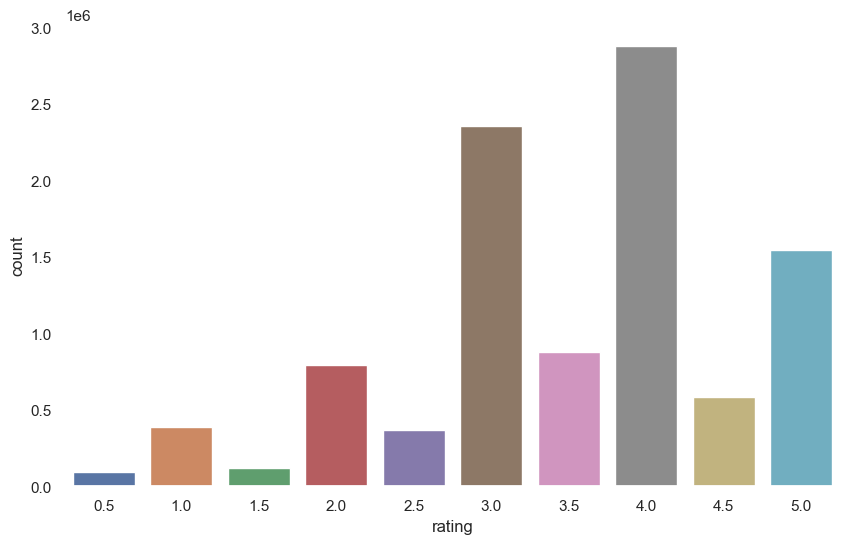

In [23]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.countplot(x = ratings["rating"])

In [24]:
genre_popularity = (movies[movie_lens_columns["genre"]].str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama        5339
Comedy       3703
Thriller     1706
Romance      1685
Action       1473
Crime        1118
Adventure    1025
Horror       1013
Sci-Fi        754
Fantasy       543
Name: genre, dtype: int64

## Sparsity

In [25]:
n_users = ratings[movie_lens_columns["user_id"]].nunique()
n_movies = ratings[movie_lens_columns["movie_id"]].nunique()
print('number of users = {}\nnumber of movies = {}'.format(n_users, n_movies))
print('sparsity level for ratings is {}%'.format(round((1.0 - len(ratings)/float(n_users*n_movies))*100, 3)))

number of users = 69878
number of movies = 10677
sparsity level for ratings is 98.66%


In [26]:
print('sparsity level for tags is {}%'.format(round((1.0 - len(tags)/float(n_users*n_movies))*100, 3)))

sparsity level for tags is 99.987%


## User Summary

In [27]:
user_summary = pd.DataFrame(ratings.groupby(movie_lens_columns["user_id"])['rating'].count())
user_summary.columns = ['rating_frequency']
user_summary['rating_mean'] = ratings.groupby(movie_lens_columns["user_id"])['rating'].mean()
print(user_summary) 
user_summary.describe()

         rating_frequency  rating_mean
user_id                               
1                      22     5.000000
2                      20     3.200000
3                      33     3.939394
4                      38     4.026316
5                      87     3.850575
...                   ...          ...
71563                  43     3.441860
71564                 105     2.980952
71565                 145     3.889655
71566                  49     3.836735
71567                  53     3.207547

[69878 rows x 2 columns]


,rating_frequency,rating_mean
count,69878.00000,69878.000000
mean,143.10733,3.613641
std,216.71258,0.428244
min,20.00000,0.500000
25%,35.00000,3.360000
50%,69.00000,3.634615
75%,156.00000,3.900000
max,7359.00000,5.000000


Average user rating is 3.68

## Clean tags

In [28]:
def filter_tags(arr):
    filtered_tags = []
    removed_tags = []
    for word in arr:
        new_word = ""
        for letter in word:
            # remove punctuation and only include letters, numbers and spaces
            if letter not in '''!()-[]{};:'"\,<>./?@#$%^&*_~''' and (letter in (string.ascii_letters + string.digits + ' ')):
                new_word += letter
        if new_word != "":
            filtered_tags.append(new_word.upper())
        else:
            filtered_tags.append(np.nan)
            removed_tags.append(word)
    return filtered_tags, removed_tags

filtered_tags,removed_tags = filter_tags(tags_for_movie_1)
print(filtered_tags)
print("\n")
print(removed_tags)
    

['FAMILY', nan, 'TUMEYS TO SEE AGAIN', 'JOHN LASSETER', 'NATIONAL FILM REGISTRY', 'IMDB TOP 250', 'ADVENTURE', 'RATEDG', 'ALMOST FAVORITE', 'ACTION FIGURE', 'LIGHT', 'TOYS', 'PIXAR', 'ANIMATED', 'BUDDY MOVIE', 'WOODY', 'COMEDY', 'ACTION FIGURES', 'USA', 'FANCIFUL', 'PIXAR ANIMATION', 'WANT', 'CLASSIC', 'ROUSING', 'WITTY', 'TIM ALLEN', 'CLEVER', 'COMPUTER ANIMATION', 'TUMEYS VHS', 'FUN', 'WANT TO SEE AGAIN', 'LOTS OF HEART', 'TOM HANKS', 'ENGAGING', 'ANIMATION', 'CG ANIMATION', 'ERLENDS DVDS', 'KIDS MOVIE', '3D', 'HUMOROUS', 'DARING RESCUES', 'UNLIKELY FRIENDSHIPS', 'HEROIC MISSION', 'AVI', 'CGI', 'BUZZ LIGHTYEAR', 'FUNNY', 'ANIMATION', 'DISNEY', 'VERY GOOD', 'BUY', 'CARTOON', 'CHILDREN', 'FANTASY', 'DISNEY', 'THE BOYS', 'BRIGHT', 'PIXAR', 'DISNEY ANIMATED FEATURE', 'YA BOY', 'TOY', 'FIRST CGI FILM', 'TIME TRAVEL', 'TOYS COME TO LIFE', 'VILLIAN HURTS TOYS', 'WARM']


['é˜®ä¸€é¸£']


In [29]:
# def filter_tag_strings(tag):
#     new_word = ""
#     for letter in tag:
#         # remove punctuation and only include letters, numbers and spaces
#         if letter not in '''!()-[]{};:'"\,<>./?@#$%^&*_~''' and (letter in (string.ascii_letters + string.digits + ' ')):
#             new_word += letter
#     return new_word

# filter_tag_strings('''hii*i'"i i'!d''')

In [30]:
filtered_tags,removed_tags = filter_tags(list(tags_dropna["tag"]))
print(set(removed_tags))
pd.DataFrame(filtered_tags)

{'é˜®ä¸€é¸£', '\xa0', '========================', '************************', '=========================', '===================', '===========================', '================', '=============', '==============', '====================', 'Â\xa0', ':-)', '===========', '============', 'Ø§Ø\xadØ³Ø§Ø³Ø§ØªÙŠ', '>', '=====================', '===============', '+++++++++++++++', '????????????????????', '==================', '=======================', '==============================', '================='}


,0
0,EXCELLENT
1,POLITICS
2,SATIRE
3,CHICK FLICK 212
4,HANKS
...,...
95559,GOTHIC
95560,CHICK FLICK
95561,COMEDY
95562,GOTHIC


In [31]:
# ensure size of column is maintained
assert tags_dropna["tag"].shape[0] == len(filtered_tags)

### Remove random characters from 'tag' column

In [32]:
# tags_dropna["tag"]
# # tags_dropna.loc[:, "tag"] = tags_dropna["tag"].map(lambda word: filter_tag_strings(word))
filtered_tags_df = tags_dropna.copy()
filtered_tags, removed_tags = filter_tags(list(tags_dropna["tag"]))
assert len(filtered_tags) == filtered_tags_df["tag"].shape[0]
filtered_tags_df["tag"] = filtered_tags
# filter_tags(list(tags_dropna["tag"]))

print(f'{len(removed_tags)} Tags have been converted to NA')
print(removed_tags)
filtered_tags_df

68 Tags have been converted to NA
['Ø§Ø\xadØ³Ø§Ø³Ø§ØªÙŠ', '\xa0', 'é˜®ä¸€é¸£', 'Â\xa0', ':-)', '\xa0', '\xa0', '\xa0', '\xa0', '==================', '=================', '========================', '=====================', '=========================', '===========================', '==============================', '====================', '=============', '==================', '================', '=======================', '===================', '************************', '===============', '=======================', '===============', '============', '=======================', '===================', '=====================', '===================', '==================', '=========================', '========================', '===========', '==============', '=======================', '+++++++++++++++', '================', '====================', '************************', '????????????????????', '\xa0', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '

,user_id,movie_id,tag
0,15,4973,EXCELLENT
1,20,1747,POLITICS
2,20,1747,SATIRE
3,20,2424,CHICK FLICK 212
4,20,2424,HANKS
...,...,...,...
95575,71556,1377,GOTHIC
95576,71556,2424,CHICK FLICK
95577,71556,3033,COMEDY
95578,71556,3081,GOTHIC


In [33]:
assert filtered_tags_df["tag"].isna().sum() == len(removed_tags)

In [34]:
filtered_tags_df = filtered_tags_df.dropna(how="all", subset=["tag"], axis=0)
filtered_tags_df.isna().sum()

user_id     0
movie_id    0
tag         0
dtype: int64

### Format 'genre' column in movies dataset

In [35]:
filtered_movies_df = movies.copy()
filtered_movies_df[movie_lens_columns["genre"]] = filtered_movies_df[movie_lens_columns["genre"]].str.upper()
filtered_movies_df[movie_lens_columns["genre"]] = filtered_movies_df[movie_lens_columns["genre"]].str.replace(pat="|", repl=" ")
filtered_movies_df[movie_lens_columns["genre"]] = filtered_movies_df[movie_lens_columns["genre"]].str.replace(pat="-", repl="")
# e.g. SCI-FI
set(filtered_movies_df[movie_lens_columns["genre"]])

C:\Users\44759\AppData\Local\Temp\ipykernel_36528\2776374158.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered_movies_df[movie_lens_columns["genre"]] = filtered_movies_df[movie_lens_columns["genre"]].str.replace(pat="|", repl=" ")


{'(NO GENRES LISTED)',
 'ACTION',
 'ACTION ADVENTURE',
 'ACTION ADVENTURE ANIMATION CHILDREN COMEDY',
 'ACTION ADVENTURE ANIMATION CHILDREN COMEDY FANTASY',
 'ACTION ADVENTURE ANIMATION CHILDREN COMEDY IMAX',
 'ACTION ADVENTURE ANIMATION CHILDREN COMEDY SCIFI',
 'ACTION ADVENTURE ANIMATION CHILDREN FANTASY',
 'ACTION ADVENTURE ANIMATION CHILDREN SCIFI',
 'ACTION ADVENTURE ANIMATION COMEDY DRAMA',
 'ACTION ADVENTURE ANIMATION COMEDY SCIFI',
 'ACTION ADVENTURE ANIMATION DRAMA FANTASY',
 'ACTION ADVENTURE ANIMATION DRAMA FANTASY SCIFI',
 'ACTION ADVENTURE ANIMATION FANTASY',
 'ACTION ADVENTURE ANIMATION FANTASY SCIFI',
 'ACTION ADVENTURE ANIMATION HORROR SCIFI',
 'ACTION ADVENTURE ANIMATION MYSTERY ROMANCE',
 'ACTION ADVENTURE ANIMATION SCIFI',
 'ACTION ADVENTURE ANIMATION SCIFI THRILLER',
 'ACTION ADVENTURE CHILDREN',
 'ACTION ADVENTURE CHILDREN COMEDY',
 'ACTION ADVENTURE CHILDREN COMEDY CRIME',
 'ACTION ADVENTURE CHILDREN COMEDY FANTASY SCIFI',
 'ACTION ADVENTURE CHILDREN COMEDY MYSTER

#### Remove '(NO GENRES LISTED)' occurences from Movie dataset

In [36]:
filtered_movies_df.loc[filtered_movies_df[movie_lens_columns["genre"]] == "(NO GENRES LISTED)"]

,movie_id,title,genre
7903,8606,Pull My Daisy (1958),(NO GENRES LISTED)


In [37]:
def find_movies_w_no_genre():
    return filtered_movies_df.loc[filtered_movies_df[movie_lens_columns["genre"]] == "(NO GENRES LISTED)"][movie_lens_columns["movie_id"]]

# movie_ids_to_remove = ()
# # list(movie_ids_to_remove)
# ratings = ratings[~ratings["movieId"].isin(list(movie_ids_to_remove))]

# grouped_tag_df = grouped_tag_df[~grouped_tag_df["movieId"].isin(list(movie_ids_to_remove))]
# filtered_tags_df = filtered_tags_df[~filtered_tags_df["movieId"].isin(list(movie_ids_to_remove))]

filtered_movies_df = filtered_movies_df[filtered_movies_df[movie_lens_columns["genre"]].str.contains("(NO GENRES LISTED)") == False]
filtered_movies_df.loc[filtered_movies_df[movie_lens_columns["genre"]] == "(NO GENRES LISTED)"]

C:\Users\44759\AppData\Local\Temp\ipykernel_36528\628417272.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_movies_df = filtered_movies_df[filtered_movies_df[movie_lens_columns["genre"]].str.contains("(NO GENRES LISTED)") == False]


,movie_id,title,genre


## Save cleaned DF to Pickle

In [38]:
# filtered_movies_df.to_pickle("cleaned_movies_.pkl")
# filtered_tags_df.to_pickle("cleaned_tags.pkl")
# # ratings kept same except timestamp removed
# ratings.to_pickle("cleaned_ratings.pkl")

In [39]:
print(len(filtered_tags_df[movie_lens_columns["movie_id"]].unique()))
print(len(filtered_movies_df[movie_lens_columns["movie_id"]].unique()))
print(len(ratings[movie_lens_columns["movie_id"]].unique()))

7601
10680
10677


### ensure all three CSV files have same unique movieIDs

In [40]:
movie_ids_to_keep = set(filtered_tags_df[movie_lens_columns["movie_id"]].unique()).intersection(set(filtered_movies_df[movie_lens_columns["movie_id"]].unique())).intersection(set(ratings[movie_lens_columns["movie_id"]].unique()))

tags_df_w_dropped_movieID = filtered_tags_df[filtered_tags_df[movie_lens_columns["movie_id"]].isin(list(movie_ids_to_keep))]
movies_df_w_dropped_movieID = filtered_movies_df[filtered_movies_df[movie_lens_columns["movie_id"]].isin(list(movie_ids_to_keep))]
ratings_df_w_dropped_movieID = ratings[ratings[movie_lens_columns["movie_id"]].isin(list(movie_ids_to_keep))]
print(len(tags_df_w_dropped_movieID[movie_lens_columns["movie_id"]].unique()))
print(len(movies_df_w_dropped_movieID[movie_lens_columns["movie_id"]].unique()))
print(len(ratings_df_w_dropped_movieID[movie_lens_columns["movie_id"]].unique()))

7596
7596
7596


In [41]:
# movies_df_w_dropped_movieID.to_pickle("cleaned_dropped_movies.pkl")
# tags_df_w_dropped_movieID.to_pickle("cleaned_dropped_tags.pkl")
# ratings_df_w_dropped_movieID.to_pickle("cleaned_dropped_ratings.pkl")

In [42]:
# movies_df_w_dropped_movieID = pd.read_pickle("cleaned_dropped_movies.pkl")
# tags_df_w_dropped_movieID = pd.read_pickle("cleaned_dropped_tags.pkl")
# ratings_df_w_dropped_movieID = pd.read_pickle("cleaned_dropped_ratings.pkl")

In [43]:
ratings_df_w_dropped_movieID

,user_id,movie_id,rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0
3,1,292,5.0
4,1,316,5.0
...,...,...,...
10000049,71567,2107,1.0
10000050,71567,2126,2.0
10000051,71567,2294,5.0
10000052,71567,2338,2.0


In [44]:
tags_df_w_dropped_movieID

,user_id,movie_id,tag
0,15,4973,EXCELLENT
1,20,1747,POLITICS
2,20,1747,SATIRE
3,20,2424,CHICK FLICK 212
4,20,2424,HANKS
...,...,...,...
95575,71556,1377,GOTHIC
95576,71556,2424,CHICK FLICK
95577,71556,3033,COMEDY
95578,71556,3081,GOTHIC


## Group tags by movieID

In [45]:
grouped_tag_df = tags_df_w_dropped_movieID.groupby(movie_lens_columns["movie_id"])["tag"].apply(list).map(lambda x: " ".join(x)).reset_index(name='tag')
grouped_tag_df

,movie_id,tag
0,1,PIXAR PIXAR PIXAR ANIMATION PIXAR ANIMATED FUN...
1,2,FOR CHILDREN GAME ANIMALS JOE JOHNSTON ROBIN W...
2,3,FUNNIEST MOVIES COMEDINHA DE VELHINHOS ENGRAAD...
3,4,GIRL MOVIE
4,5,STEVE MARTIN PREGNANCY REMAKE STEVE MARTIN FAM...
...,...,...
7591,64993,ANIME ANIME DRAMA JAPAN LOVE
7592,65006,DOPPLEGANGER NUDITY REAR NUDITY TOPLESS NOTAB...
7593,65037,ASPERGERS SYNDROME AUTISM BASED ON NOVEL FAKE ...
7594,65126,CHUCK PALAHNIUK BASED ON BOOK


In [46]:
ratings_movies_df = pd.merge(ratings_df_w_dropped_movieID,  movies_df_w_dropped_movieID, on=movie_lens_columns["movie_id"])
test_train = pd.merge(ratings_movies_df,  grouped_tag_df, on=movie_lens_columns["movie_id"])
test_train

,user_id,movie_id,rating,title,genre,tag
0,1,122,5.0,Boomerang (1992),COMEDY ROMANCE,DATING NUDITY TOPLESS BRIEF CANT REMEMBER
1,139,122,3.0,Boomerang (1992),COMEDY ROMANCE,DATING NUDITY TOPLESS BRIEF CANT REMEMBER
2,149,122,2.5,Boomerang (1992),COMEDY ROMANCE,DATING NUDITY TOPLESS BRIEF CANT REMEMBER
3,182,122,3.0,Boomerang (1992),COMEDY ROMANCE,DATING NUDITY TOPLESS BRIEF CANT REMEMBER
4,215,122,4.5,Boomerang (1992),COMEDY ROMANCE,DATING NUDITY TOPLESS BRIEF CANT REMEMBER
...,...,...,...,...,...,...
9708483,70905,59044,1.5,Diminished Capacity (2008),COMEDY,ALZHEIMERS DISEASE MEMORY LOSS
9708484,66220,3195,4.0,Tess of the Storm Country (1922),DRAMA,REMAKE
9708485,67385,3195,3.0,Tess of the Storm Country (1922),DRAMA,REMAKE
9708486,67771,3195,2.0,Tess of the Storm Country (1922),DRAMA,REMAKE


In [47]:
test_train.isna().sum()

user_id     0
movie_id    0
rating      0
title       0
genre       0
tag         0
dtype: int64

80/20 split based on: 
U. Kuzelewska, ‘Clustering algorithms in hybrid recommender system on movielens data’, Studies in logic, grammar and rhetoric, vol. 37, no. 1, pp. 125–139, 2014.

In [48]:
train_df, test_val_df = train_test_split(test_train, 
                                stratify=test_train[movie_lens_columns["user_id"]], 
                                test_size=0.20,
                                random_state=4)

test_df, val_df = train_test_split(test_val_df, 
                                stratify=test_val_df[movie_lens_columns["user_id"]], 
                                test_size=0.50,
                                random_state=4)
                                
print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Validation set: %d' % len(val_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 7766790
# interactions on Validation set: 970849
# interactions on Test set: 970849


In [49]:
train_df

,user_id,movie_id,rating,title,genre,tag
8629636,10776,2670,2.0,"Run Silent, Run Deep (1958)",WAR,SUBMARINE WORLD WAR II SUBMARINE WORLD WAR II
4283707,48330,3477,2.0,Empire Records (1995),COMEDY DRAMA,TEEN CULT CLASSIC NETWATCH I DONT HAVE TO EXPL...
7983000,38917,3681,3.5,For a Few Dollars More (Per qualche dollaro in...,ACTION DRAMA THRILLER WESTERN,ITALIAN ACTION SERGIO LEONE SERGIO LEONE IMDB ...
1206025,41333,597,5.0,Pretty Woman (1990),COMEDY ROMANCE,GIRLIE MOVIE JULIA ROBERTS ROMANCE GIRLIE MOVI...
1949381,63347,1527,2.5,"Fifth Element, The (1997)",ACTION ADVENTURE SCIFI,PARODY BRUCE WILLIS BRUCE WILLIS WANT IT DVD L...
...,...,...,...,...,...,...
2617206,4156,6,4.5,Heat (1995),ACTION CRIME THRILLER,CANT REMEMBER SETTINGLA WHO CARES DVDS OVERRAT...
6428282,28591,783,1.0,"Hunchback of Notre Dame, The (1996)",ANIMATION CHILDREN MUSICAL,DISNEY AWFUL DISNEY WAS REALLY REACHING FOR MA...
3960627,71339,2640,4.0,Superman (1978),ACTION ADVENTURE SCIFI,BIG BUDGET COMIC BOOK SUPERHERO CINEMATOGRAPHE...
3462633,48976,1673,5.0,Boogie Nights (1997),DRAMA,MOVIE BUSINESS PORNOGRAPHY PAUL THOMAS ANDERSO...


In [50]:
train_df = train_df.reset_index(drop=True)
train_df

,user_id,movie_id,rating,title,genre,tag
0,10776,2670,2.0,"Run Silent, Run Deep (1958)",WAR,SUBMARINE WORLD WAR II SUBMARINE WORLD WAR II
1,48330,3477,2.0,Empire Records (1995),COMEDY DRAMA,TEEN CULT CLASSIC NETWATCH I DONT HAVE TO EXPL...
2,38917,3681,3.5,For a Few Dollars More (Per qualche dollaro in...,ACTION DRAMA THRILLER WESTERN,ITALIAN ACTION SERGIO LEONE SERGIO LEONE IMDB ...
3,41333,597,5.0,Pretty Woman (1990),COMEDY ROMANCE,GIRLIE MOVIE JULIA ROBERTS ROMANCE GIRLIE MOVI...
4,63347,1527,2.5,"Fifth Element, The (1997)",ACTION ADVENTURE SCIFI,PARODY BRUCE WILLIS BRUCE WILLIS WANT IT DVD L...
...,...,...,...,...,...,...
7766785,4156,6,4.5,Heat (1995),ACTION CRIME THRILLER,CANT REMEMBER SETTINGLA WHO CARES DVDS OVERRAT...
7766786,28591,783,1.0,"Hunchback of Notre Dame, The (1996)",ANIMATION CHILDREN MUSICAL,DISNEY AWFUL DISNEY WAS REALLY REACHING FOR MA...
7766787,71339,2640,4.0,Superman (1978),ACTION ADVENTURE SCIFI,BIG BUDGET COMIC BOOK SUPERHERO CINEMATOGRAPHE...
7766788,48976,1673,5.0,Boogie Nights (1997),DRAMA,MOVIE BUSINESS PORNOGRAPHY PAUL THOMAS ANDERSO...


In [51]:
val_df = val_df.reset_index(drop=True)
val_df

,user_id,movie_id,rating,title,genre,tag
0,1177,2908,4.0,Boys Don't Cry (1999),DRAMA,HOMOPHOBIA LESBIAN RAPE TRUE STORY GAY OPPRESS...
1,32288,165,3.0,Die Hard: With a Vengeance (1995),ACTION CRIME THRILLER,TERRORISM ACTION BRUCE WILLIS SAMUEL L JACKSON...
2,10284,2694,3.0,Big Daddy (1999),COMEDY,GOLDEN RASPBERRY WORST ACTOR ADAM SANDLER DIDN...
3,33555,39,2.0,Clueless (1995),COMEDY ROMANCE,TEEN JANE AUSTEN WANT TO OWN EMMA JANE AUSTEN ...
4,34422,457,3.0,"Fugitive, The (1993)",THRILLER,TOMMY LEE JONES CHASE TV SERIES EXCELLENT JUST...
...,...,...,...,...,...,...
970844,40166,5459,3.0,Men in Black II (2002),ACTION COMEDY SCIFI,TOMMY LEE JONES WILL SMITH FUNNY GOOD INTRIGUI...
970845,45207,2527,3.0,Westworld (1973),ACTION SCIFI THRILLER WESTERN,FUTURISTMOVIESCOM SUSPENSE MICHAEL CRICHTON TU...
970846,25509,1784,4.0,As Good As It Gets (1997),COMEDY DRAMA ROMANCE,PSYCHOLOGY DIVX GREG KINNEAR RATEDPG13 COMEDY ...
970847,1302,1801,2.5,"Man in the Iron Mask, The (1998)",ACTION ADVENTURE DRAMA,GOOD BUT NOT ACCURATE MASK REMAKE ADVENTURE FR...


In [52]:
test_df = test_df.reset_index(drop=True)
test_df

,user_id,movie_id,rating,title,genre,tag
0,52238,2613,2.0,Night of the Comet (1984),COMEDY HORROR SCIFI,END OF THE WORLD TEEN END OF THE WORLD END OF ...
1,8481,3555,2.5,U-571 (2000),ACTION THRILLER,WAR MOVIE WWII WWII ACTION WAR WAR WWII BORING...
2,18352,919,3.0,"Wizard of Oz, The (1939)",ADVENTURE CHILDREN FANTASY MUSICAL,BASED ON A BOOK BLACK AND WHITE AFI 100 EMERSO...
3,22984,7832,3.0,"Thin Man Goes Home, The (1945)",COMEDY CRIME MYSTERY,NICK AND NORA CHARLES DETECTIVE MOVIE NICK AND...
4,50840,7173,3.5,Along Came Polly (2004),COMEDY ROMANCE,GIRLIE MOVIE JENNIFER ANISTON BIBLIOTHEK BEN S...
...,...,...,...,...,...,...
970844,42489,3208,3.0,Loaded Weapon 1 (1993),ACTION COMEDY,NATIONAL LAMPOON PARODY CAMEOBRUCE WILLIS CANT...
970845,5917,191,1.0,"Scarlet Letter, The (1995)",DRAMA ROMANCE,TRASH GARY OLDMAN
970846,39670,2640,5.0,Superman (1978),ACTION ADVENTURE SCIFI,BIG BUDGET COMIC BOOK SUPERHERO CINEMATOGRAPHE...
970847,67026,7454,2.5,Van Helsing (2004),ACTION ADVENTURE FANTASY HORROR,BIG BUDGET MORONIC KATE BECKINSALE MY DVDS HUG...


In [53]:
pd.to_pickle(train_df, "train_df.pkl")
pd.to_pickle(val_df, "val_df.pkl")
pd.to_pickle(test_df, "test_df.pkl")
